In [1]:
!pip install pandas

In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
!pip install numpy

In [6]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
data = pd.read_csv("stepcountck.csv")
data.head(4561)


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierStepCount,iPhone,16.7.7,count,2024-07-01 00:56:16 +0300,2024-07-01 00:45:56 +0300,2024-07-01 00:46:14 +0300,23,"<<HKDevice: 0x283bece10>, name:iPhone, manufac..."
1,HKQuantityTypeIdentifierStepCount,iPhone,16.7.8,count,2024-07-01 11:07:56 +0300,2024-07-01 10:56:53 +0300,2024-07-01 11:06:25 +0300,86,"<<HKDevice: 0x283bece10>, name:iPhone, manufac..."
2,HKQuantityTypeIdentifierStepCount,iPhone,16.7.8,count,2024-07-01 11:18:36 +0300,2024-07-01 11:07:33 +0300,2024-07-01 11:07:59 +0300,25,"<<HKDevice: 0x283bece10>, name:iPhone, manufac..."
3,HKQuantityTypeIdentifierStepCount,iPhone,16.7.8,count,2024-07-01 11:31:43 +0300,2024-07-01 11:21:37 +0300,2024-07-01 11:31:36 +0300,41,"<<HKDevice: 0x283bece10>, name:iPhone, manufac..."
4,HKQuantityTypeIdentifierStepCount,iPhone,16.7.8,count,2024-07-01 11:42:36 +0300,2024-07-01 11:31:38 +0300,2024-07-01 11:31:41 +0300,2,"<<HKDevice: 0x283bece10>, name:iPhone, manufac..."
...,...,...,...,...,...,...,...,...,...
4555,HKQuantityTypeIdentifierStepCount,iPhone,16.7.10,count,2024-12-20 00:16:16 +0300,2024-12-20 00:03:40 +0300,2024-12-20 00:07:42 +0300,165,"<<HKDevice: 0x283bd6620>, name:iPhone, manufac..."
4556,HKQuantityTypeIdentifierStepCount,iPhone,16.7.10,count,2024-12-20 00:25:38 +0300,2024-12-20 00:13:59 +0300,2024-12-20 00:23:58 +0300,928,"<<HKDevice: 0x283bd6620>, name:iPhone, manufac..."
4557,HKQuantityTypeIdentifierStepCount,iPhone,16.7.10,count,2024-12-20 00:36:30 +0300,2024-12-20 00:23:58 +0300,2024-12-20 00:33:57 +0300,996,"<<HKDevice: 0x283bd6620>, name:iPhone, manufac..."
4558,HKQuantityTypeIdentifierStepCount,iPhone,16.7.10,count,2024-12-20 00:36:50 +0300,2024-12-20 00:33:57 +0300,2024-12-20 00:36:47 +0300,285,"<<HKDevice: 0x283bd6620>, name:iPhone, manufac..."


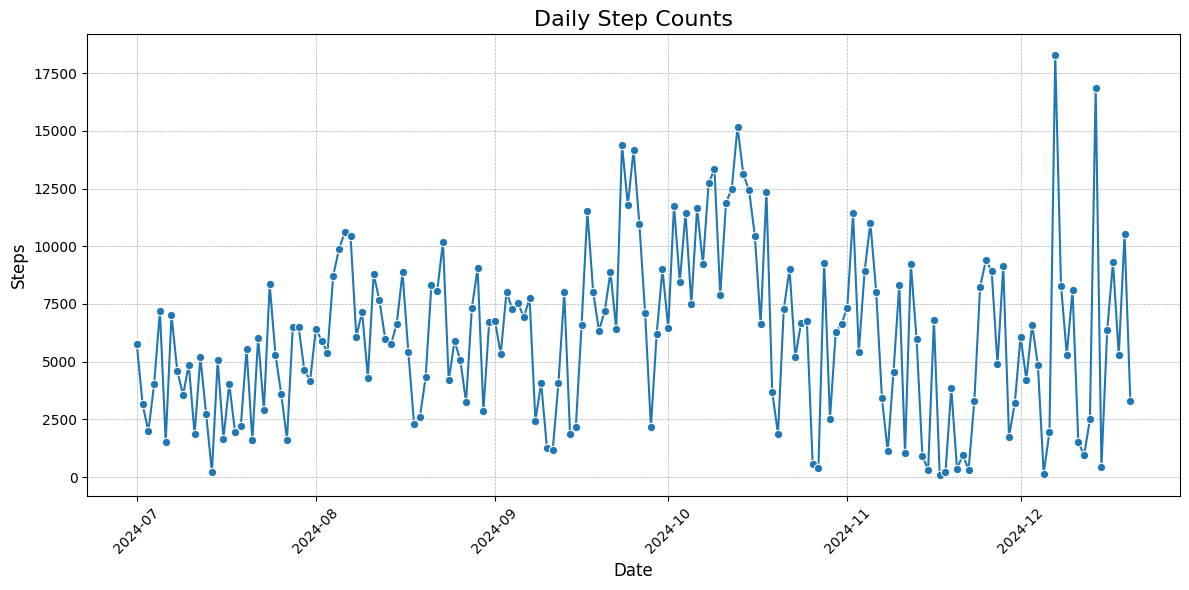

In [7]:
data['startDate'] = pd.to_datetime(data['startDate'])  # Convert to datetime
data['date'] = data['startDate'].dt.date  # Extract the date

# Group by date and sum the steps
daily_steps = data.groupby('date')['value'].sum().reset_index()
daily_steps.columns = ['Date', 'Total Steps']

# Visualize daily step counts using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Steps', data=daily_steps, marker='o')
plt.title('Daily Step Counts', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Steps', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\404085037.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['WeekYear'] = data['startDate'].dt.to_period('W')  # Extract week-year period


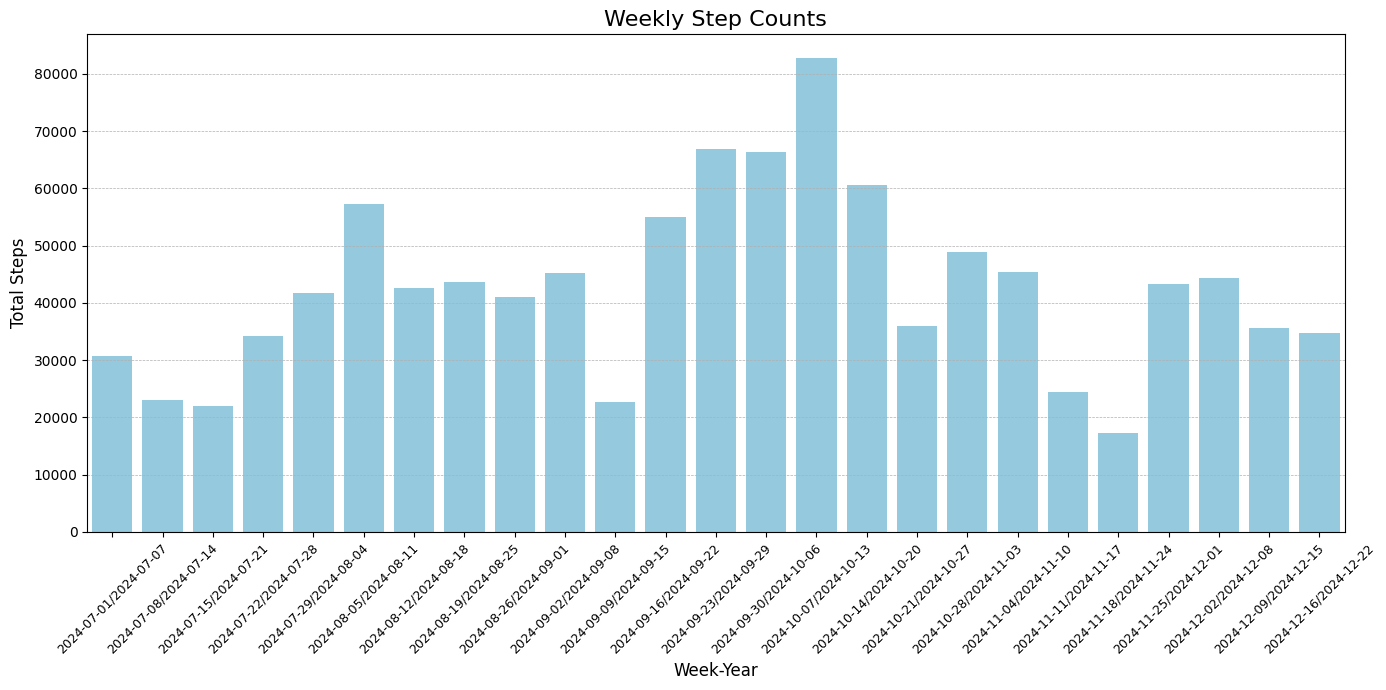

In [8]:
# Convert 'startDate' to datetime and extract week number and year
data['startDate'] = pd.to_datetime(data['startDate'])
data['WeekYear'] = data['startDate'].dt.to_period('W')  # Extract week-year period

# Group by week-year and sum the steps
weekly_steps = data.groupby('WeekYear')['value'].sum().reset_index()
weekly_steps.columns = ['WeekYear', 'Total Steps']

# Visualize weekly step counts using seaborn and matplotlib
plt.figure(figsize=(14, 7))
sns.barplot(x=weekly_steps['WeekYear'].astype(str), y=weekly_steps['Total Steps'], color='skyblue')
plt.title('Weekly Step Counts', fontsize=16)
plt.xlabel('Week-Year', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)
plt.xticks(rotation=45, fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\2600346323.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['startDate'].dt.to_period('M')  # Extract year-month as a period


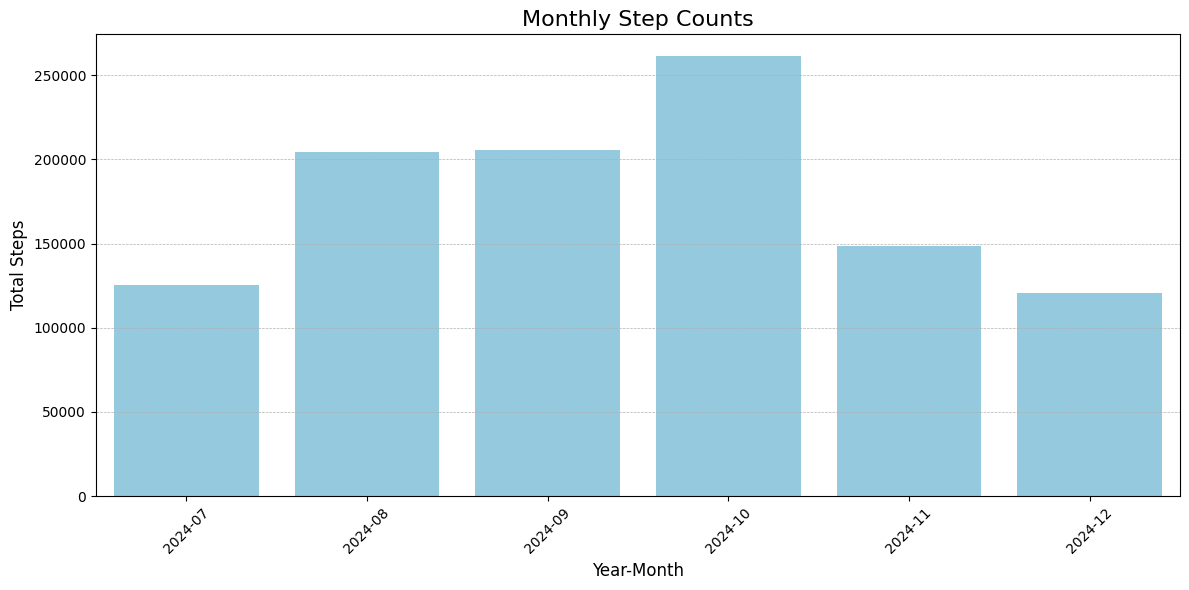

In [9]:
# Convert 'startDate' to datetime and extract month and year
data['startDate'] = pd.to_datetime(data['startDate'])
data['YearMonth'] = data['startDate'].dt.to_period('M')  # Extract year-month as a period

# Group by year-month and sum the step counts
monthly_steps = data.groupby('YearMonth')['value'].sum().reset_index()
monthly_steps.columns = ['YearMonth', 'Total Steps']

# Visualize monthly step counts using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_steps['YearMonth'].astype(str), y=monthly_steps['Total Steps'], color='skyblue')
plt.title('Monthly Step Counts', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\878686968.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_steps = data.groupby('TimeOfDay')['value'].sum().reset_index()


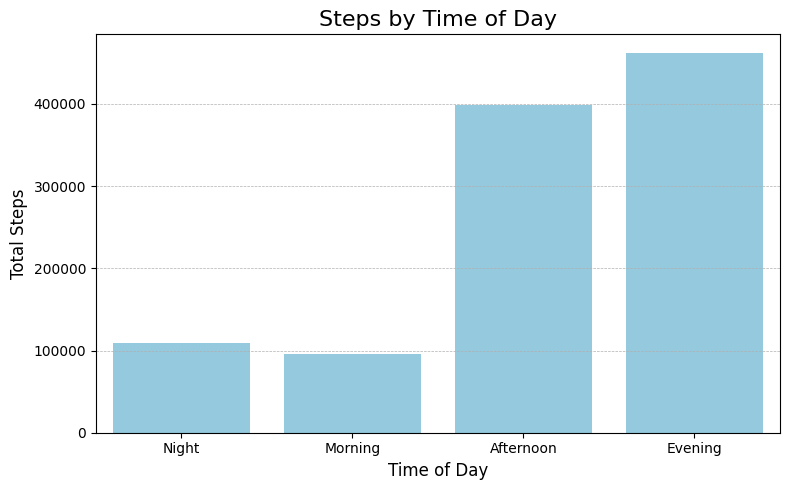

In [10]:
data['Hour'] = data['startDate'].dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data['TimeOfDay'] = pd.cut(data['Hour'], bins=bins, labels=labels, right=False)

time_of_day_steps = data.groupby('TimeOfDay')['value'].sum().reset_index()
time_of_day_steps.columns = ['TimeOfDay', 'Total Steps']

plt.figure(figsize=(8, 5))
sns.barplot(x='TimeOfDay', y='Total Steps', data=time_of_day_steps, color='skyblue')
plt.title('Steps by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [11]:
Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['value'] < Q1 - 1.5 * IQR) | (data['value'] > Q3 + 1.5 * IQR)]
print(outliers)

                                   type sourceName sourceVersion   unit  \
17    HKQuantityTypeIdentifierStepCount     iPhone        16.7.8  count   
18    HKQuantityTypeIdentifierStepCount     iPhone        16.7.8  count   
19    HKQuantityTypeIdentifierStepCount     iPhone        16.7.8  count   
21    HKQuantityTypeIdentifierStepCount     iPhone        16.7.8  count   
22    HKQuantityTypeIdentifierStepCount     iPhone        16.7.8  count   
...                                 ...        ...           ...    ...   
4490  HKQuantityTypeIdentifierStepCount     iPhone       16.7.10  count   
4498  HKQuantityTypeIdentifierStepCount     iPhone       16.7.10  count   
4556  HKQuantityTypeIdentifierStepCount     iPhone       16.7.10  count   
4557  HKQuantityTypeIdentifierStepCount     iPhone       16.7.10  count   
4559  HKQuantityTypeIdentifierStepCount     iPhone       16.7.10  count   

                   creationDate                 startDate  \
17    2024-07-01 22:18:18 +0300 2024-0

In [12]:
!pip install scipy

In [13]:
print(data['value'].describe())

count    4560.000000
mean      233.669737
std       285.939266
min         1.000000
25%        30.000000
50%        96.000000
75%       347.250000
max      1170.000000
Name: value, dtype: float64


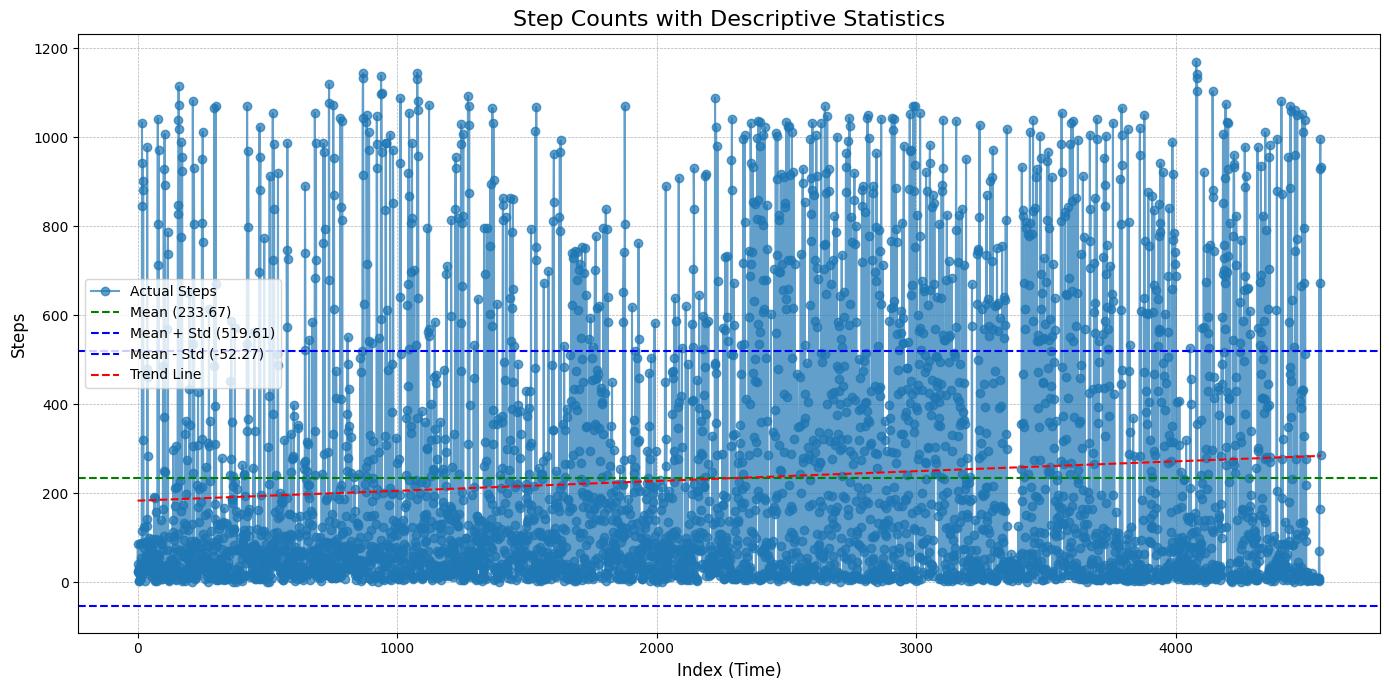

In [14]:
from scipy.stats import linregress
# Ensure the 'value' column is numeric
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# Calculate descriptive statistics
stats = data['value'].describe()

# Calculate the trend line using linear regression
x = np.arange(len(data['value']))
y = data['value'].fillna(0)  # Handling any missing values
trend = linregress(x, y)

# Predicted values based on the regression line
y_trend = trend.slope * x + trend.intercept

# Plot the step counts with annotations for mean and standard deviation
plt.figure(figsize=(14, 7))
plt.plot(x, y, label='Actual Steps', linestyle='-', marker='o', alpha=0.7)

# Highlighting mean and std
mean = stats['mean']
std = stats['std']
plt.axhline(mean, color='green', linestyle='--', label=f'Mean ({mean:.2f})')
plt.axhline(mean + std, color='blue', linestyle='--', label=f'Mean + Std ({mean + std:.2f})')
plt.axhline(mean - std, color='blue', linestyle='--', label=f'Mean - Std ({mean - std:.2f})')

# Add the trend line
plt.plot(x, y_trend, color='red', linestyle='--', label='Trend Line')

# Formatting the plot
plt.title('Step Counts with Descriptive Statistics', fontsize=16)
plt.xlabel('Index (Time)', fontsize=12)
plt.ylabel('Steps', fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()